# Проект: Обучение с учителем: качество модели

**Описание проекта:**
    Интернет-магазин "В один клик" предлагает широкий ассортимент товаров, от продуктов питания до бытовой техники. Однако, отчет за прошлый период свидетельствует о снижении активности постоянных клиентов. В условиях, когда привлечение новых клиентов становится менее эффективным, руководство магазина приняло решение сосредоточиться на удержании активности существующей клиентуры.

**Цель:**
    Целью проекта является разработка системы персонализированных предложений для постоянных клиентов интернет-магазина "В один клик" с целью увеличения их покупательской активности.

**Задачи:**
    
1. Проанализировать данные и выявить признаки, описывающие поведение постоянных клиентов.
2. Подготовить данные для построения модели, включая сбор дополнительных данных о прибыльности клиентов.
3. Построить модель, предсказывающую вероятность снижения покупательской активности клиента в ближайшие три месяца.
4. Выделить сегменты клиентов и разработать персонализированные предложения для каждого сегмента.

**План проекта:**

1. [Загрузка данных](#scrollTo=PgNht2zyOXpx)
2. [Предобработка данных](#scrollTo=37_orFL9OXp2)
3. [Исследовательский анализ данных](#scrollTo=aWDSOwNqOXp7)
4. [Объединение таблиц](#scrollTo=J1CDRXmTOXqF)
5. [Корреляционный анализ](#scrollTo=xq-FLSfmOXqG)
6. [Использование пайплайнов](#scrollTo=C3zQv8siOXqJ)
7. [Анализ важности признаков](#scrollTo=zoIqDAfWOXqM)
8. [Сегментация покупателей](#scrollTo=8D1-omHkOXqO)
9. [Общий вывод](#scrollTo=q95C6pwSOXqX)

## Загрузка данных

In [ ]:
!pip install phik -q

In [ ]:
!pip install scikit-learn==1.4.2 -q

In [ ]:
!pip install shap -q

In [ ]:
!pip install shap --upgrade -q

In [ ]:
!pip install  matplotlib --upgrade -q

In [ ]:
!pip install  seaborn --upgrade -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import pylab
import shap

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro
from io import StringIO

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV

TEST_SIZE = 0.25
RANDOM_STATE = 42

In [ ]:
df_main = pd.read_csv('/datasets/market_file.csv')
df_market_money = pd.read_csv('/datasets/market_money.csv')
df_time = pd.read_csv('/datasets/market_time.csv')
df_money = pd.read_csv('/datasets/money.csv', sep= ';', decimal= ',')

In [ ]:
df_main.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

1. id — номер покупателя в корпоративной базе данных.
2. Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
3. Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
4. Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
5. Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
6. Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
7. Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
8. Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
9. Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
10. Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
11. Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
12. Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
13. Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

In [ ]:
df_market_money.head()

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [ ]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


1. id — номер покупателя в корпоративной базе данных.
2. Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
3. Выручка — сумма выручки за период.

In [ ]:
df_time.head()

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [ ]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


1. id — номер покупателя в корпоративной базе данных.
2. Период — название периода, во время которого зафиксировано общее время.
3. минут — значение времени, проведённого на сайте, в минутах.

In [ ]:
df_money.head()

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

In [ ]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


1. id — номер покупателя в корпоративной базе данных.
2. Прибыль — значение прибыли.

**Вывод:**
   Первичный анализ показал, что пропуски в данных отсутствуют, так же стоит изменить названия некоторых столбцов и привести их к змеиному регистру. Тип данных соответствует содержанию столбцов.

## Предобработка данных

### Изменение названий столбцев

In [ ]:
dfs = [df_main, df_market_money, df_time, df_money]
for df in dfs:
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    print(df.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


### Поиск дубликатов

In [ ]:
def duplicates_df(df,name):
    duplicates = df[df.duplicated()]
    if  duplicates.empty:
        print(f'Явных дубликатов для {name} не обнаружено.')
    else:
        print(f'Обнаружены явные дубликаты для {name}:')
    return

In [ ]:
duplicates_df(df_main,'df_main')
duplicates_df(df_market_money,'df_market_money')
duplicates_df(df_time,'df_time')
duplicates_df(df_money,'df_money')

Явных дубликатов для df_main не обнаружено.
Явных дубликатов для df_market_money не обнаружено.
Явных дубликатов для df_time не обнаружено.
Явных дубликатов для df_money не обнаружено.


#### Поиск и обработка неявных дубликатов

In [ ]:
def hidden_duplicates_df(df,name,subset):
    unique_df = df.drop_duplicates(subset=subset)
    duplicates = len(df) - len(unique_df)
    if len(df) == len(unique_df):
        print(f'нет неявных дубликатов в датафрейме {name}')
    else:
        print(f'есть неявные дубликаты в датафрейме {name}, кол-во дубликатов: {duplicates}')

In [ ]:
hidden_duplicates_df(df_main,'df_main', ['id','длительность','страниц_за_визит'])
hidden_duplicates_df(df_market_money,'df_market_money',['id','период'])
hidden_duplicates_df(df_time,'df_time', ['id','период'])
hidden_duplicates_df(df_money,'df_money', ['id'])

нет неявных дубликатов в датафрейме df_main
нет неявных дубликатов в датафрейме df_market_money
нет неявных дубликатов в датафрейме df_time
нет неявных дубликатов в датафрейме df_money


In [ ]:
def analyze_column(df):
    results = {}
    for col in df.columns:
        if df[col].dtype == 'object':
            unique_values = df[col].unique()
            num_unique_values = df[col].nunique()
            value_counts = df[col].value_counts()
            results[col] = (unique_values, num_unique_values, value_counts)

    return results

results = analyze_column(df_main)
for col, (unique_values, num_unique_values, value_counts) in results.items():
    print(f"\n Анализ столбца '{col}':")
    print("\n Уникальные значения:", unique_values)
    print("Количество уникальных значений:", num_unique_values)
    print("Частота уникальных значений:")
    print(value_counts)


 Анализ столбца 'покупательская_активность':

 Уникальные значения: ['Снизилась' 'Прежний уровень']
Количество уникальных значений: 2
Частота уникальных значений:
Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

 Анализ столбца 'тип_сервиса':

 Уникальные значения: ['премиум' 'стандартт' 'стандарт']
Количество уникальных значений: 3
Частота уникальных значений:
стандарт     914
премиум      376
стандартт     10
Name: тип_сервиса, dtype: int64

 Анализ столбца 'разрешить_сообщать':

 Уникальные значения: ['да' 'нет']
Количество уникальных значений: 2
Частота уникальных значений:
да     962
нет    338
Name: разрешить_сообщать, dtype: int64

 Анализ столбца 'популярная_категория':

 Уникальные значения: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Количество уникальных значений: 6
Частота уникальных значений:
Товары для детей         

In [ ]:
df_main['тип_сервиса'].replace({"стандартт" : "стандарт"}, inplace=True)
df_main['популярная_категория'].replace({"Косметика и аксесуары" :"Косметика и аксеcсуары"}, inplace=True)
print(df_main['тип_сервиса'].unique())
print(df_main['популярная_категория'].unique())

['премиум' 'стандарт']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксеcсуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [ ]:
results = analyze_column(df_market_money)
for col, (unique_values, num_unique_values, value_counts) in results.items():
    print(f"\n Анализ столбца '{col}':")
    print("\n Уникальные значения:", unique_values)
    print("Количество уникальных значений:", num_unique_values)
    print("Частота уникальных значений:")
    print(value_counts)


 Анализ столбца 'период':

 Уникальные значения: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
Количество уникальных значений: 3
Частота уникальных значений:
препредыдущий_месяц    1300
предыдущий_месяц       1300
текущий_месяц          1300
Name: период, dtype: int64


In [ ]:
results = analyze_column(df_time)
for col, (unique_values, num_unique_values, value_counts) in results.items():
    print(f"\n Анализ столбца '{col}':")
    print("\n Уникальные значения:", unique_values)
    print("Количество уникальных значений:", num_unique_values)
    print("Частота уникальных значений:")
    print(value_counts)


 Анализ столбца 'период':

 Уникальные значения: ['текущий_месяц' 'предыдцщий_месяц']
Количество уникальных значений: 2
Частота уникальных значений:
предыдцщий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64


In [ ]:
df_time['период'].replace({"предыдцщий_месяц" : "предыдущий_месяц"}, inplace=True)
print(df_time['период'].unique())

['текущий_месяц' 'предыдущий_месяц']


## Исследовательский анализ данных

### Исследовательский анализ данных для таблицы ***df_main***

In [ ]:
df_main.describe()

id  маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       акционные_покупки  средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

**Вывод:** Среднемесячное значение маркетинговых коммуникаций компании имеет достаточно низкое минимальное значение, какие-то пользователи, остались практически без внимания  компании. В целом данные представлены без аномальных значений, без сильных выбросов. Рассмотрим каждый столбец подробнее.

#### Анализ маркетинговой активности за 6 месяцев

In [ ]:
def plot_distribution(df, column_name ,bins=30, color='#20B2AA' ):
    plt.figure(figsize=(9, 5))
    sns.histplot(df[column_name], bins=bins, kde=True, color=color)
    plt.title(f'Распределение {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.grid(True)

    plt.figure(figsize=(9, 5))
    sns.boxplot(data=df, x=column_name, color='skyblue')
    plt.title(f'Распределение {column_name}')
    plt.xlabel(column_name)
    plt.grid(True)
    plt.show()

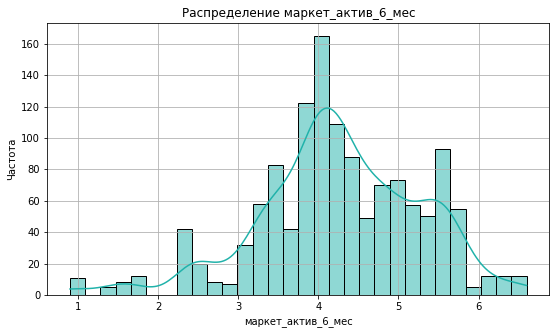

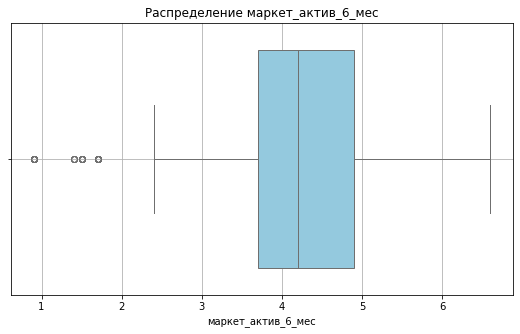

In [ ]:
plot_distribution(df_main, 'маркет_актив_6_мес')

**Вывод:**
    Ящик показывает выбросы от 1 до 2, но в данном случае, это скорее особенность данных.

#### Анализ маркетинговой активности за текущий месяц

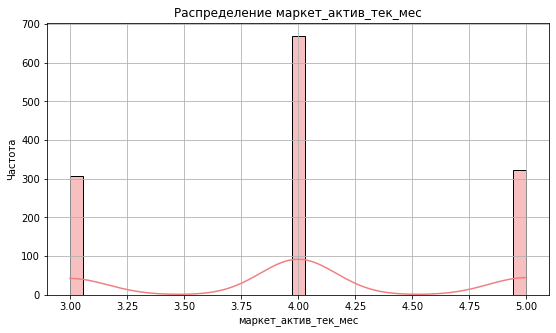

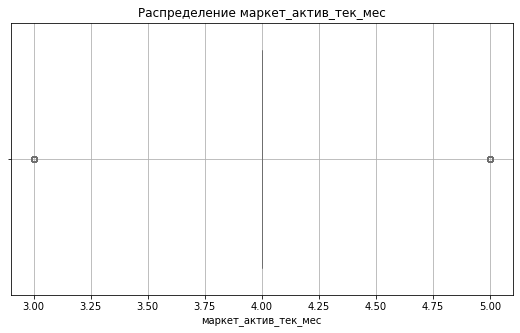

In [ ]:
plot_distribution(df_main, 'маркет_актив_тек_мес',bins=35, color='#F08080')

**Вывод:**
    Данные представлены тремя группами, данный столбец следует перенести в категориальный вид.

#### Анализ длительности регистрации

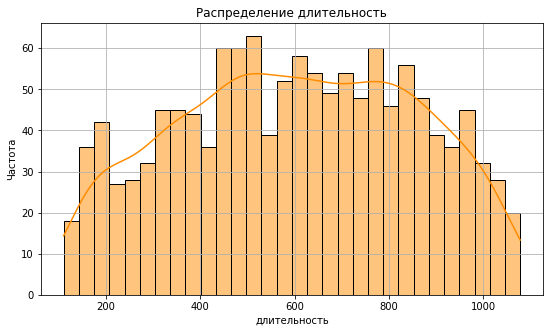

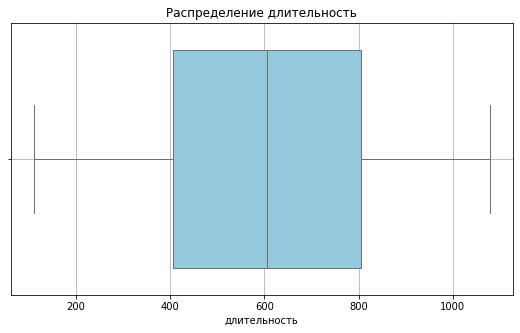

In [ ]:
plot_distribution(df_main, 'длительность', color='#FF8C00')

**Вывод:** Данные для выборки могли быть отобраны по этому столбцу, поэтому минимальное количество дней после регистрации составляет не менее 110 дней. Поскольку мы анализируем постоянных пользователей для их удержания, а не привлечения новых.

#### Анализ акционных покупок

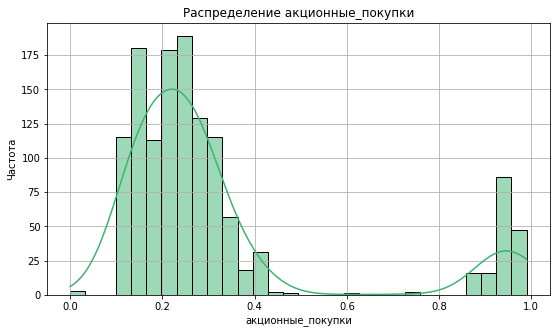

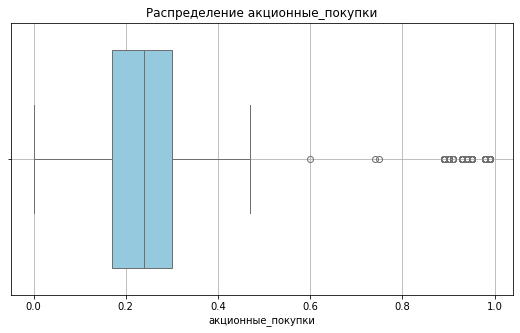

In [ ]:
plot_distribution(df_main,'акционные_покупки', color='#3CB371')

In [ ]:
stock_count = df_main[df_main['акционные_покупки'] >= 0.6]['акционные_покупки'].count()
print(f"\nКоличество значений от 0.6 до 1  в столбце 'акционные_покупки': {stock_count}")


Количество значений от 0.6 до 1  в столбце 'акционные_покупки': 168


**Вывод:** На данном графике очень мало значений в интервале от 0.5 до 0.8, количество значений от 0.5 до 1 в столбце 'акционные_покупки': 168. Их удаление может привести к искажению данных. Следует оставить их в данном виде, как особенность данных.

#### Анализ среднего просмотра категорий за визит

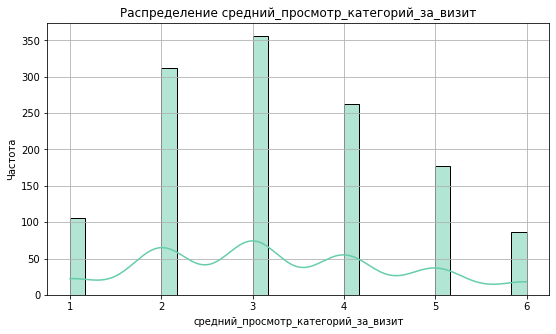

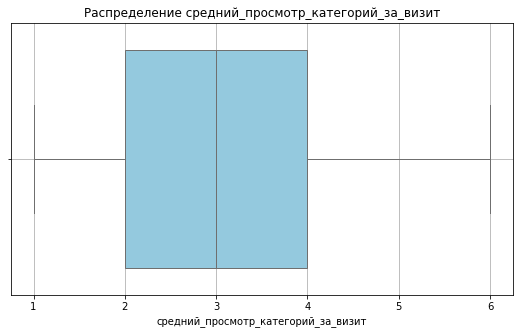

In [ ]:
plot_distribution(df_main,'средний_просмотр_категорий_за_визит', color='#66CDAA')

**Вывод:** На графике представлен узкий диапазон значений, от 1 до 6, а так же является дискретным.

#### Анализ неоплаченных продуктов за квартал

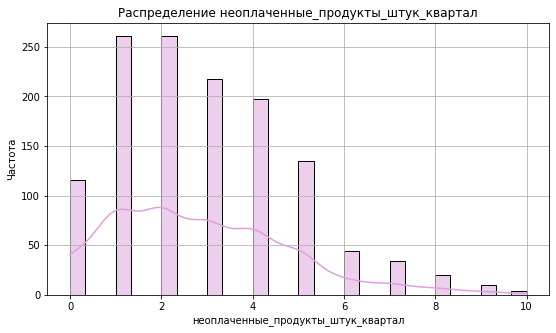

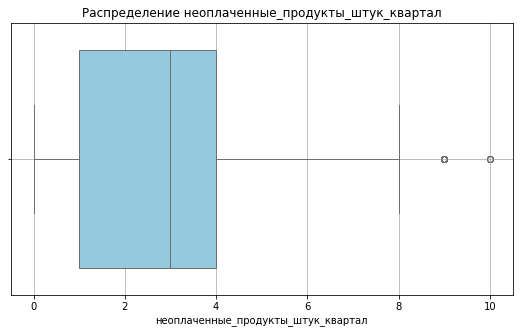

In [ ]:
plot_distribution(df_main,'неоплаченные_продукты_штук_квартал', color='#DDA0DD')

**Вывод:** На графике представлен узкий диапазон значений, от 0 до 10, а так же является дискретным. График смещен влево.

#### Анализ ошибок сервиса

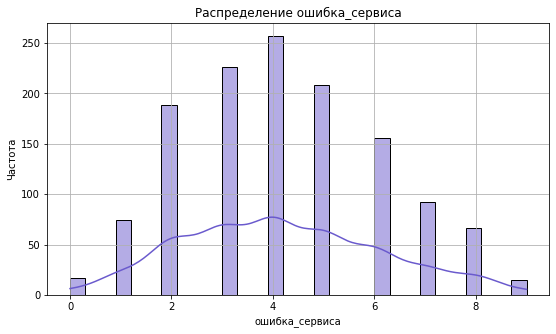

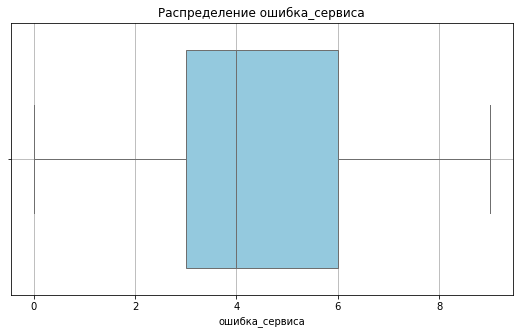

In [ ]:
plot_distribution(df_main,'ошибка_сервиса', color='#6A5ACD')

**Вывод:** На графике представлен узкий диапазон значений, от 0 до 10, а так же является дискретным.

#### Анализ страниц за визит

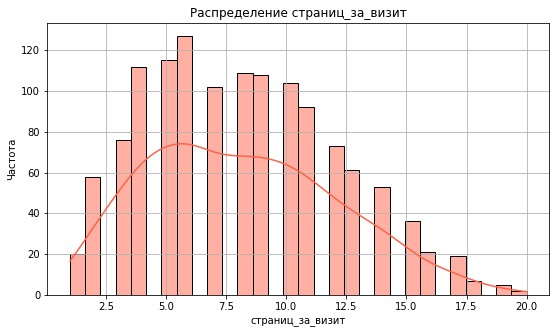

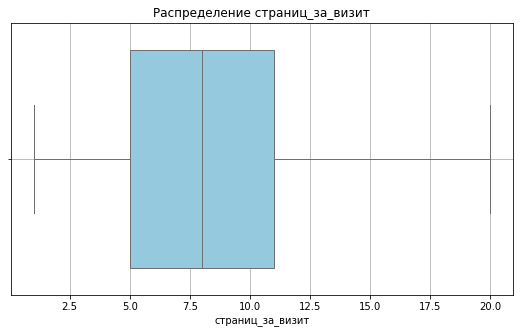

In [ ]:
plot_distribution(df_main,'страниц_за_визит', color='#FF6347')

**Вывод:** На графике представлен  диапазон значений, от 0 до 10, а так же является дискретным. График смещен влево.

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

**Вывод об анализе графиков для числовых признаков:** Большинство данных дискретны и распределены близко к нормальному. Не обнаружено аномальных значений, и удаление незначительных выбросов может исказить обучение модели. Следует учитывать этот момент при обучении модели. Преобразуем столбец 'маркет_актив_тек_мес' в категориальный ниже, затем проанализируем категориальные данные.

In [ ]:
bins = [0, 3, 4, 5]
labels = ['слабая', 'средняя', 'высокая']

df_main['маркет_актив_тек_мес_категория'] = pd.cut(df_main['маркет_актив_тек_мес'], bins=bins, labels=labels)

category_counts = df_main['маркет_актив_тек_мес_категория'].value_counts()
print(category_counts)
df_main['маркет_актив_тек_мес_категория'].isnull().sum() == 0

средняя    669
высокая    323
слабая     308
Name: маркет_актив_тек_мес_категория, dtype: int64


True

#### Анализ категориальных данных

Анализ категориального столбца 'покупательская_активность':
Уникальные значения:
['Снизилась' 'Прежний уровень']
Количество уникальных значений: 2
Распределение значений:
Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64


/tmp/ipykernel_272/1698645843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='pastel')


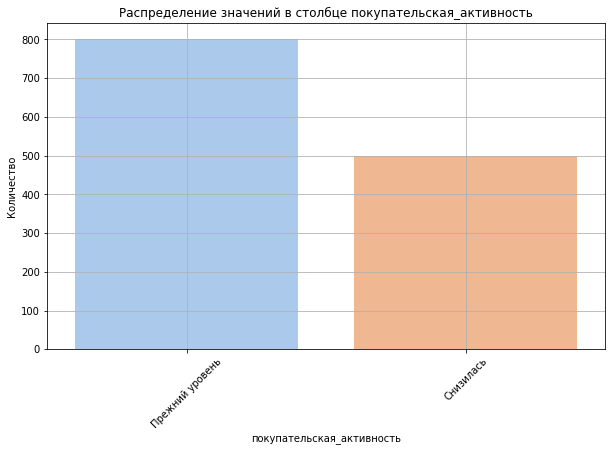



Анализ категориального столбца 'тип_сервиса':
Уникальные значения:
['премиум' 'стандарт']
Количество уникальных значений: 2
Распределение значений:
стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64


/tmp/ipykernel_272/1698645843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='pastel')


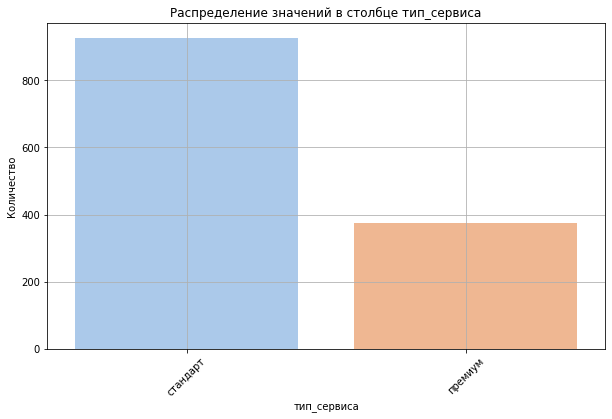



Анализ категориального столбца 'разрешить_сообщать':
Уникальные значения:
['да' 'нет']
Количество уникальных значений: 2
Распределение значений:
да     962
нет    338
Name: разрешить_сообщать, dtype: int64


/tmp/ipykernel_272/1698645843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='pastel')


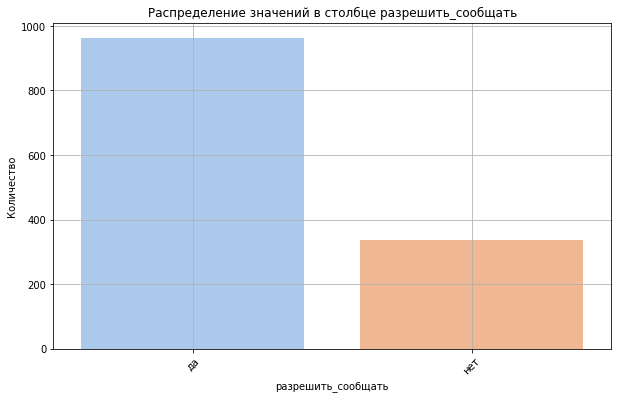



Анализ категориального столбца 'популярная_категория':
Уникальные значения:
['Товары для детей' 'Домашний текстиль' 'Косметика и аксеcсуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Количество уникальных значений: 6
Распределение значений:
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксеcсуары                  223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64


/tmp/ipykernel_272/1698645843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='pastel')


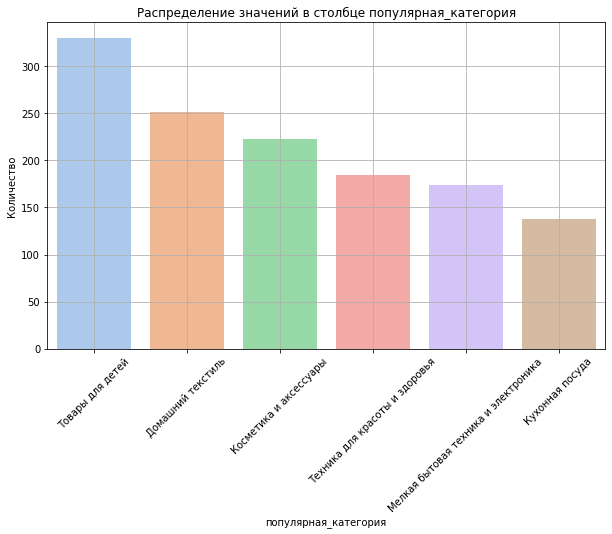



Анализ категориального столбца 'маркет_актив_тек_мес_категория':
Уникальные значения:
['высокая', 'средняя', 'слабая']
Categories (3, object): ['слабая' < 'средняя' < 'высокая']
Количество уникальных значений: 3
Распределение значений:
средняя    669
высокая    323
слабая     308
Name: маркет_актив_тек_мес_категория, dtype: int64


/tmp/ipykernel_272/1698645843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='pastel')


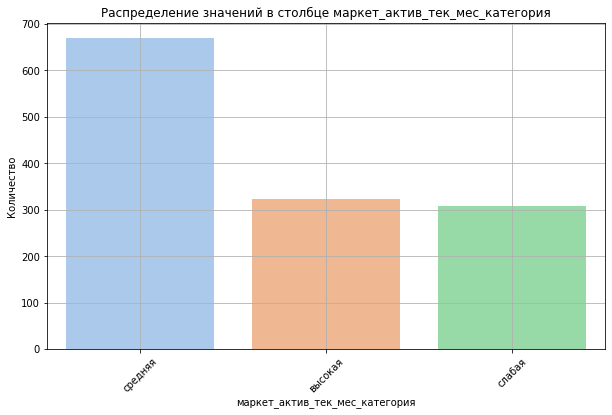

In [ ]:
def explore_cat_columns(df):
    cat_columns = df.select_dtypes(include=['object','category']).columns.tolist()

    for column in cat_columns:
        print(f"Анализ категориального столбца '{column}':")
        print("Уникальные значения:")
        print(df[column].unique())
        print("Количество уникальных значений:", len(df[column].unique()))
        print("Распределение значений:")
        print(df[column].value_counts())
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='pastel')
        plt.title(f'Распределение значений в столбце {column}')
        plt.xlabel(column)
        plt.ylabel('Количество')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
        print("\n")

explore_cat_columns(df_main)

**Вывод об анализе графиков для категориальных признаков:**
1. 'покупательская_активность': Есть две категории. В категории 'снизилась' количество строк на 300 меньше, чем в категории 'не изменилась'.
2. 'тип_сервиса': Есть две категории. Количество строк в категории 'премиум' почти в 3 раза меньше, чем в категории 'стандарт'.
3. 'разрешить_сообщать': Есть две категории. Количество строк в категории 'да' почти в 3 раза меньше, чем в категории 'нет'.
4. 'популярная_категория': Есть шесть категорий. Больше всего строк в категории 'Товары для детей', меньше всего в категории 'Кухонная посуда'. Распределение количества строк в каждой категории неравномерное.
5. 'маркет_актив_тек_мес_категория': Есть три категории. В категории 'средняя' количество строк в 2 раза больше, чем в категориях 'слабая' и 'высокая'.

### Исследовательский анализ данных для таблицы ***df_market_money***

#### Анализ выручки

In [ ]:
df_market_money['выручка'].describe()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

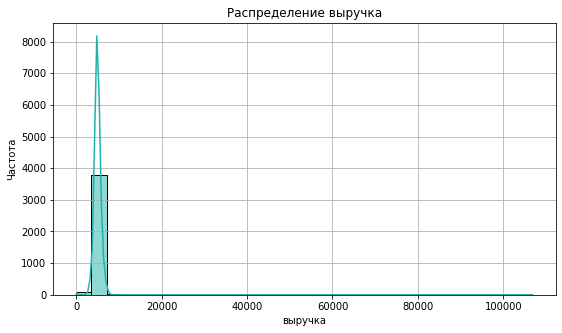

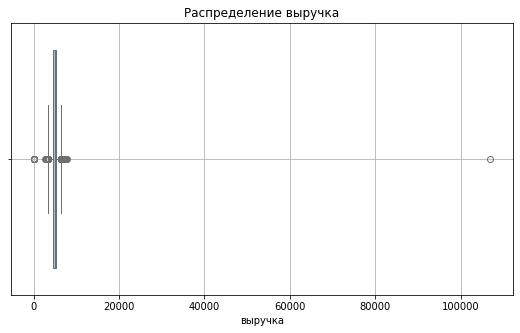

In [ ]:
plot_distribution(df_market_money, 'выручка')

In [ ]:
market_money_count = df_market_money[df_market_money['выручка'] >= 10000]['выручка'].count()
print(f"\nКоличество значений от 10000  в столбце 'выручка': {market_money_count}")


Количество значений от 10000  в столбце 'выручка': 1


In [ ]:
# Существует выброс с выручкой 106862, удалим его
df_market_money = df_market_money[df_market_money['выручка'] <= 10000]
df_market_money['выручка'].describe()

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: выручка, dtype: float64

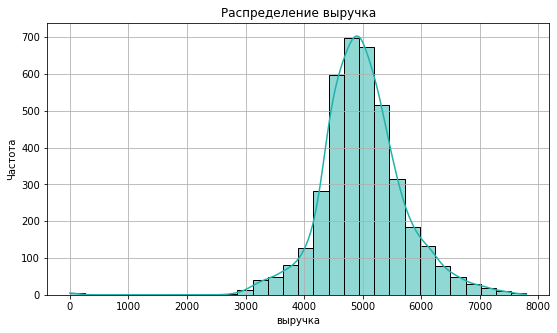

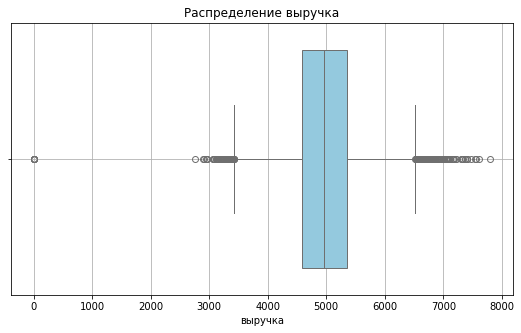

In [ ]:
plot_distribution(df_market_money, 'выручка')

#### Анализ категориального столбца 'период'

Анализ категориального столбца 'период':
Уникальные значения:
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
Количество уникальных значений: 3
Распределение значений:
препредыдущий_месяц    1300
предыдущий_месяц       1300
текущий_месяц          1299
Name: период, dtype: int64


/tmp/ipykernel_272/1698645843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='pastel')


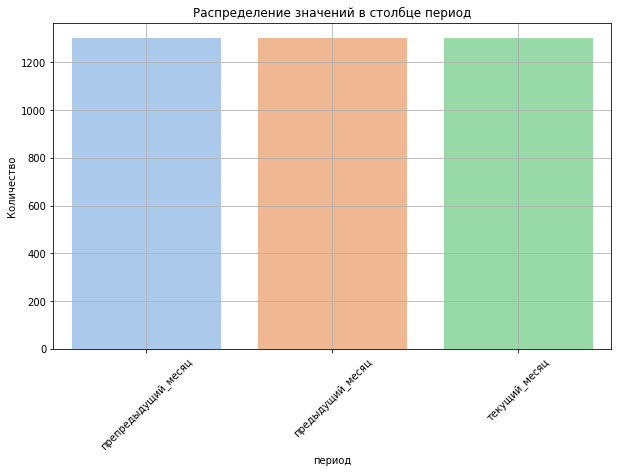

In [ ]:
explore_cat_columns(df_market_money)

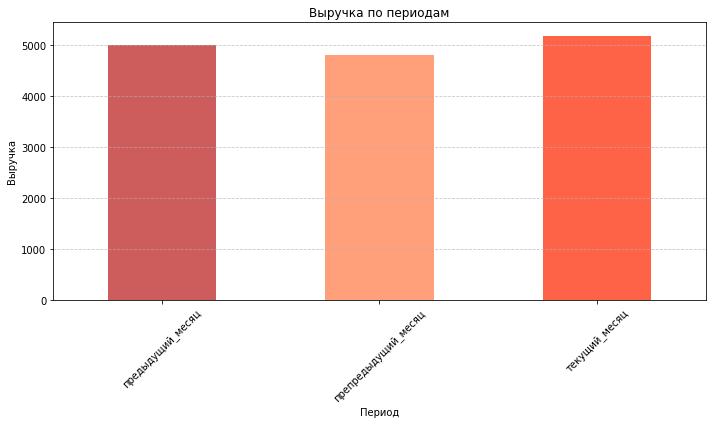

In [ ]:
revenue_by_period = df_market_money.groupby('период')['выручка'].median()

plt.figure(figsize=(10, 6))
revenue_by_period.plot(kind='bar', color=['#CD5C5C','#FFA07A','#FF6347'])
plt.title('Выручка по периодам')
plt.xlabel('Период')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Вывод:** Возможно, кто-то действительно потратил за период 106862, или же это ошибка, и на самом деле было потрачено 10 тысяч (маловероятно, и в этом нельзя быть уверенным). В любом случае, это значение сильно искажает данные, поскольку оно единственное, его удаление улучшит данные. Анализ категориального столбца 'период' показывает равномерное распределение. Анализ графика выручка по периодам показал, что средняя выручка за эти месяцы, примерно одинакова, так же выручка за текущий месяц немного превышает за прошлые.

### Отбор клиентов

In [ ]:
active_market_money = df_market_money[df_market_money['выручка'] != 0]
active_time = df_time[df_time['id'].isin(active_market_money['id'])]
print(active_time.shape)
active_market_money.shape

(2600, 3)


(3893, 3)

## Объединение таблиц

In [ ]:
print(df_main.shape)
print(df_market_money.shape)
print(df_time.shape)

(1300, 14)
(3899, 3)
(2600, 3)


In [ ]:
pivot_table_revenue = pd.pivot_table(active_market_money,
                                     index='id',
                                     columns='период',
                                     values='выручка',
                                     aggfunc='sum')
pivot_table_revenue.columns = [f"выручка_{col}" for col in pivot_table_revenue.columns]
pivot_table_minutes = pd.pivot_table(active_time,
                                     index='id',
                                     columns='период',
                                     values='минут',
                                     aggfunc='sum')

pivot_table_minutes.columns = [f"минуты_{col}" for col in pivot_table_minutes.columns]
merged_data_revenue = df_main.merge(pivot_table_revenue, on='id', how='left')
merged_data = merged_data_revenue.merge(pivot_table_minutes, on='id', how='left')
merged_data.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   2               1                 5   
1                                   4               2                 5   
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   

  маркет_актив_тек_мес_категория  выручка_предыдущий_месяц  \
0                        высокая                       NaN   
1                        средняя                    5216.0   
2                         слабая                    5457.5   
3                        высокая                    6158.0   
4                         слабая                    5807.5   

   выручка_препредыдущий_месяц  выручка_текущий_месяц  \
0                          NaN                 3293.1   
1                       4472.0                 4971.6   
2                       4826.0                 5058.4   
3                       4793.0                 6610.4   
4                       4594.0                 5872.5   

   минуты_предыдущий_месяц  минуты_текущий_месяц  
0                       13                    14  
1                       12                    10  
2                        8                    13  
3                       11                    13  
4                        8                    11

In [ ]:
active_market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 1 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3893 non-null   int64  
 1   период   3893 non-null   object 
 2   выручка  3893 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.7+ KB


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int64   
 1   покупательская_активность            1300 non-null   object  
 2   тип_сервиса                          1300 non-null   object  
 3   разрешить_сообщать                   1300 non-null   object  
 4   маркет_актив_6_мес                   1300 non-null   float64 
 5   маркет_актив_тек_мес                 1300 non-null   int64   
 6   длительность                         1300 non-null   int64   
 7   акционные_покупки                    1300 non-null   float64 
 8   популярная_категория                 1300 non-null   object  
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 11  ошибка_сервиса   

In [ ]:
drop = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
merged_data.dropna(subset=drop, inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1296 non-null   int64   
 1   покупательская_активность            1296 non-null   object  
 2   тип_сервиса                          1296 non-null   object  
 3   разрешить_сообщать                   1296 non-null   object  
 4   маркет_актив_6_мес                   1296 non-null   float64 
 5   маркет_актив_тек_мес                 1296 non-null   int64   
 6   длительность                         1296 non-null   int64   
 7   акционные_покупки                    1296 non-null   float64 
 8   популярная_категория                 1296 non-null   object  
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64   
 11  ошибка_сервиса   

**Вывод:**
    Сводная таблица создана, пропуски удалены.

## Корреляционный анализ

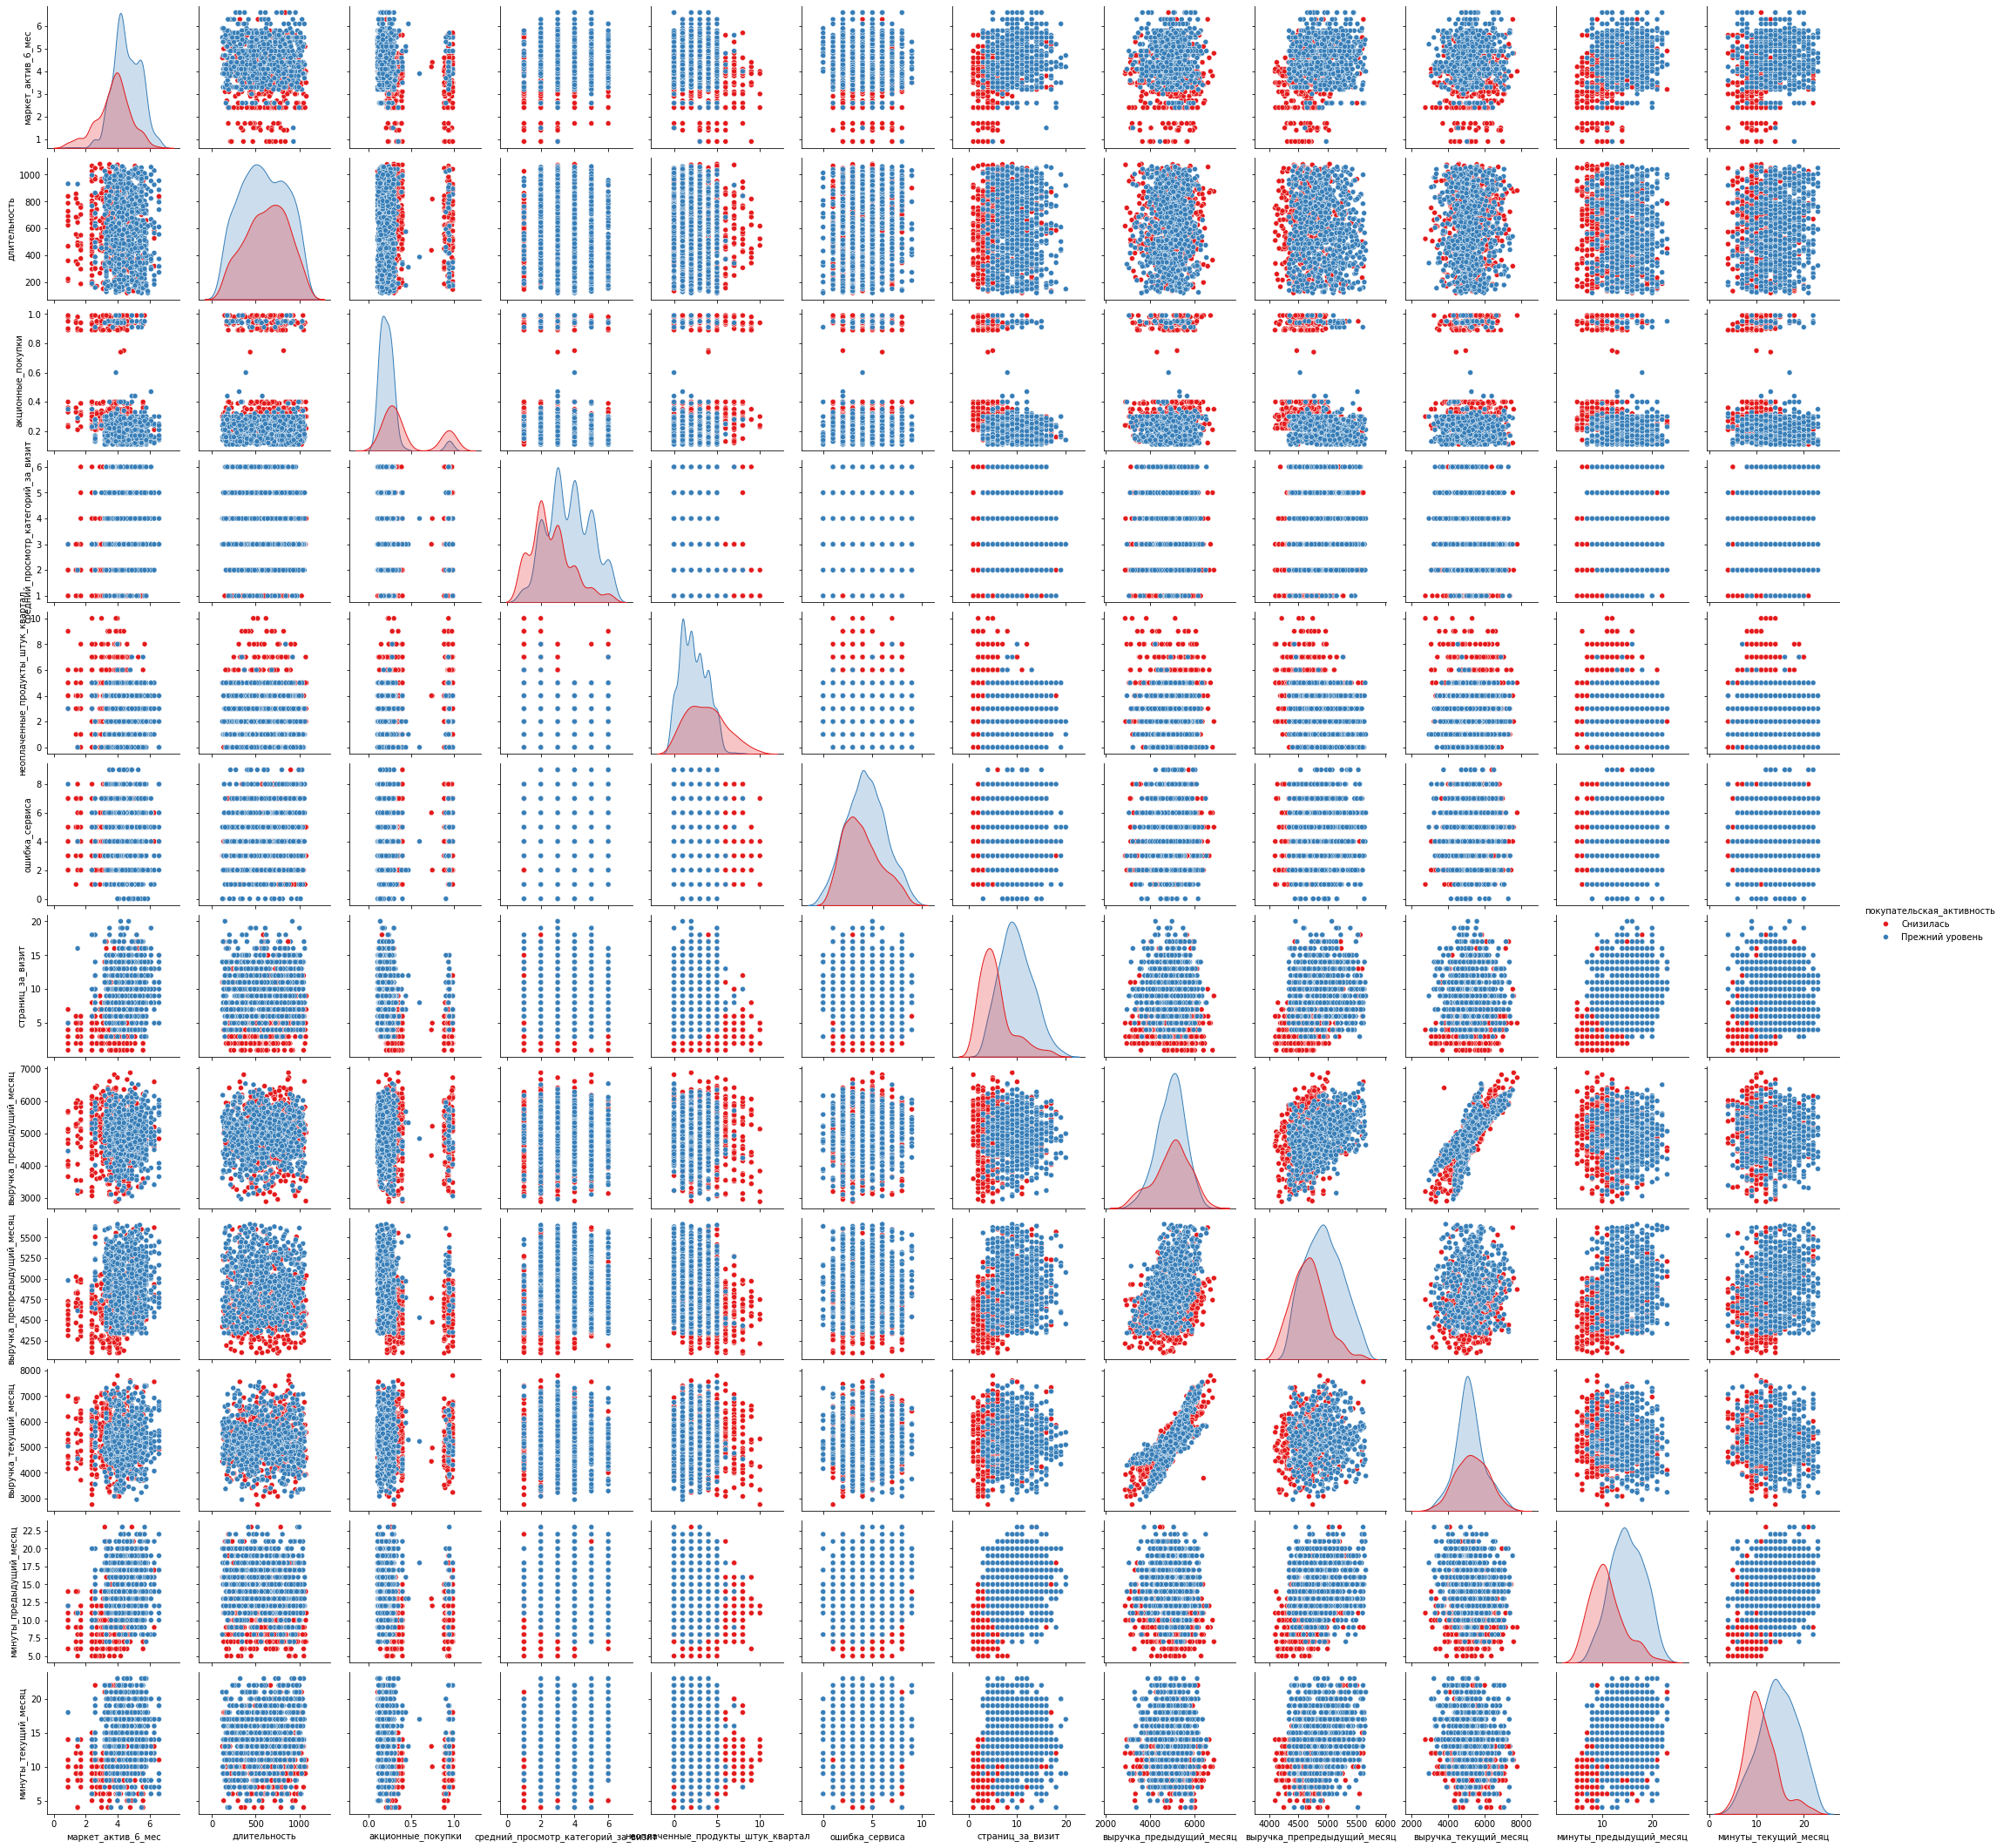

In [ ]:
numerical_features = merged_data.select_dtypes(include=['int64', 'float64']).drop(columns=['маркет_актив_тек_мес','id'])
numerical_features['покупательская_активность'] = merged_data['покупательская_активность']
sns.pairplot(numerical_features, hue='покупательская_активность', palette='Set1')
plt.show()

**Вывод:**
    Есть линейная зависимость между выручкой за предыдущий и текущий месяц. Возможно, разделение на 2 класса столбца акционных покупок и на 6 классов среднего просмотра за визит может повлиять на модель. Распределение групп для целевого признака не равномерное. Следует создать матрицы корреляции для двух случаев и для всех признаков с помощью phik, чтобы определить, какие признаки оказывают большее влияние на класс. Также посмотреть зависимость матрицы phik для двух классов вместе.

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1296 non-null   int64   
 1   покупательская_активность            1296 non-null   object  
 2   тип_сервиса                          1296 non-null   object  
 3   разрешить_сообщать                   1296 non-null   object  
 4   маркет_актив_6_мес                   1296 non-null   float64 
 5   маркет_актив_тек_мес                 1296 non-null   int64   
 6   длительность                         1296 non-null   int64   
 7   акционные_покупки                    1296 non-null   float64 
 8   популярная_категория                 1296 non-null   object  
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64   
 11  ошибка_сервиса   

### Матрица корреляции

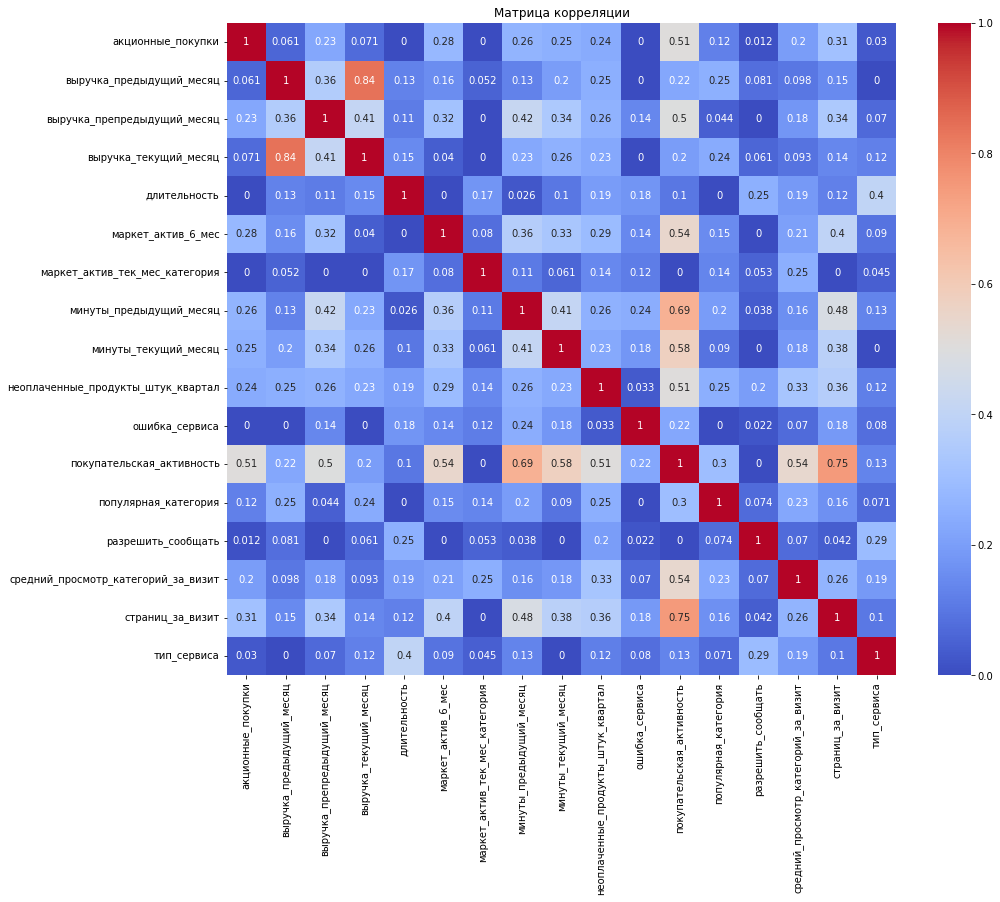

In [ ]:
columns_list = merged_data.columns.difference(['id', 'маркет_актив_тек_мес'])

correlation_matrix = merged_data[columns_list].phik_matrix(
    interval_cols=['маркет_актив_6_мес', 'длительность', 'акционные_покупки',
                   'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
                   'ошибка_сервиса', 'страниц_за_визит','выручка_предыдущий_месяц',
                   'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц',])


plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


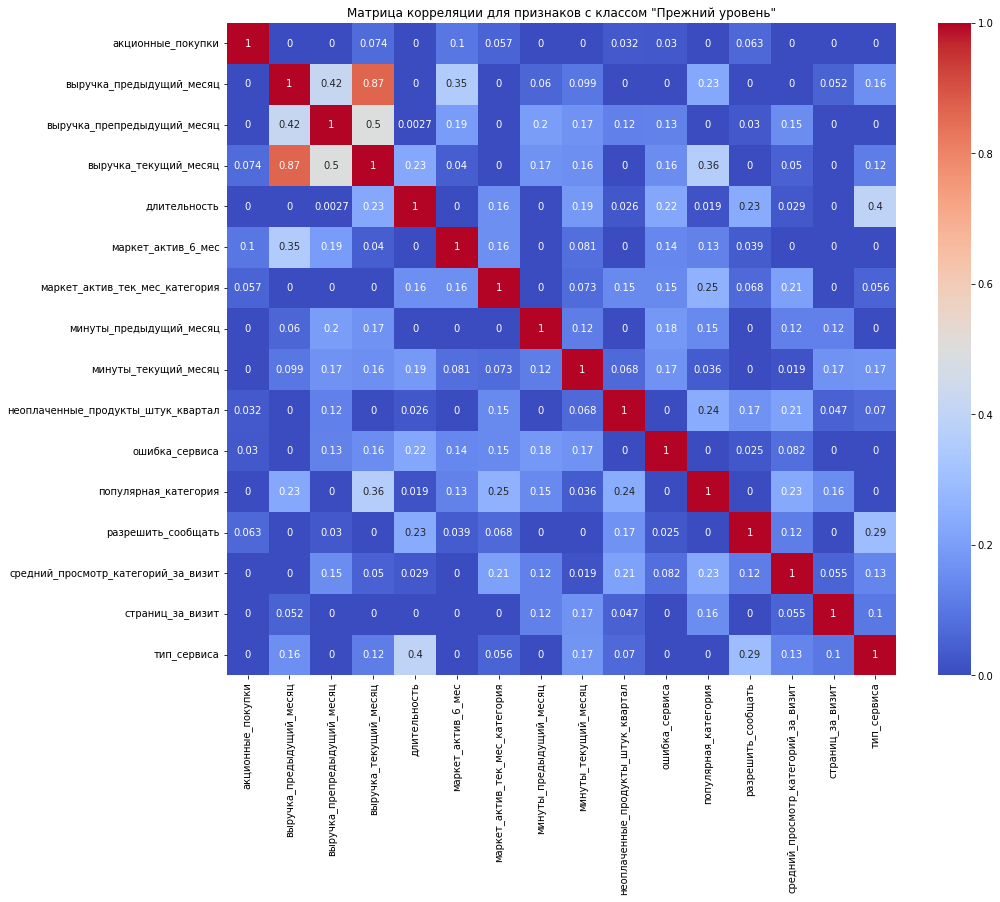

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


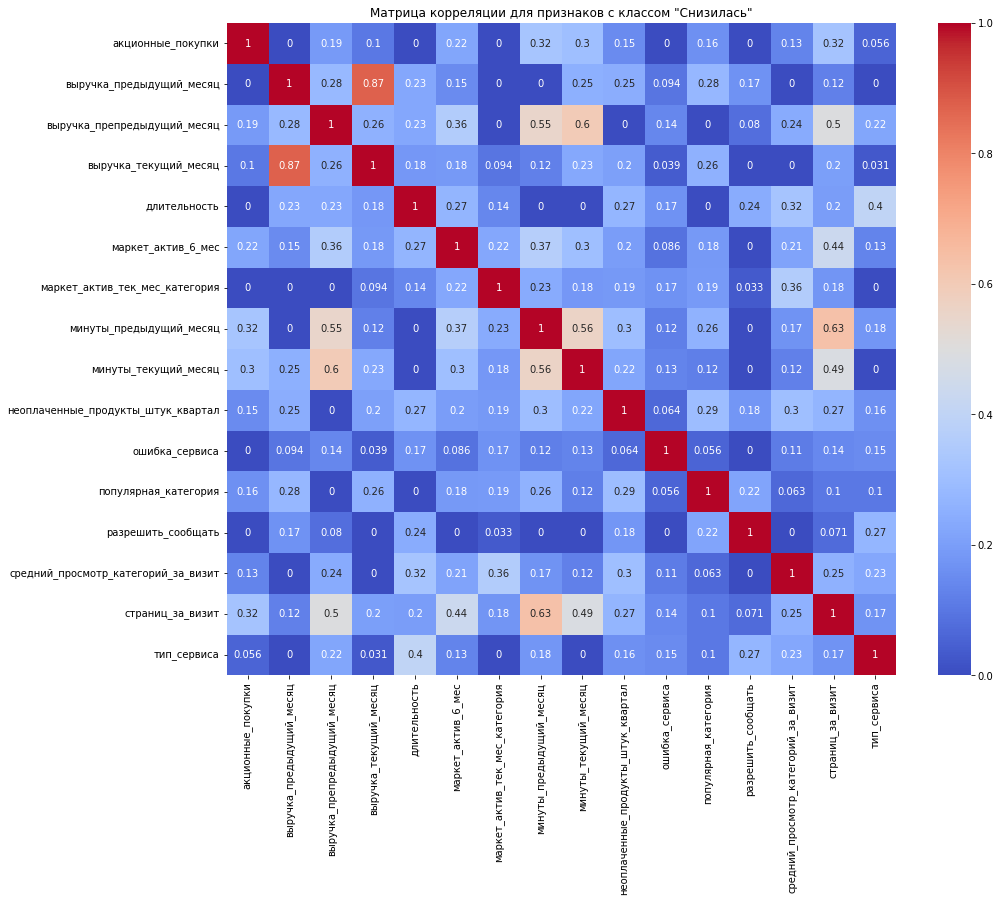

In [ ]:
columns_list = merged_data.columns.difference(['id', 'маркет_актив_тек_мес'])
groups = merged_data.groupby('покупательская_активность')

for cls, group_data in groups:
    correlation_matrix = group_data[columns_list].phik_matrix(
        interval_cols=['маркет_актив_6_мес', 'длительность', 'акционные_покупки',
                       'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
                       'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц','минуты_предыдущий_месяц', 'минуты_текущий_месяц'])

    plt.figure(figsize=(15, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Матрица корреляции для признаков с классом "{cls}"')
    plt.show()

In [ ]:
columns_list

Index(['акционные_покупки', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'длительность',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес_категория',
       'минуты_предыдущий_месяц', 'минуты_текущий_месяц',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'покупательская_активность', 'популярная_категория',
       'разрешить_сообщать', 'средний_просмотр_категорий_за_визит',
       'страниц_за_визит', 'тип_сервиса'],
      dtype='object')

**Вывод:**

1. Проведя корреляционный анализ, можно сделать вывод, что между целевым признаком и акционные_покупки',
       'выручка_препредыдущий_месяц',
       'маркет_актив_6_мес','минуты_предыдущий_месяц', 'минуты_текущий_месяц',
       'неоплаченные_продукты_штук_квартал', 'популярная_категория',
        'средний_просмотр_категорий_за_визит',
       'страниц_за_визит.
   
   
2. Между страницами за визит и временем на сайте 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', а так же  'длительность', маркет_актив_6_мес' есть зависимость, и это не удивительно, поскольку чем больше пользователь просмотрел страниц, тем дольше он провел времени на сайте. Следовательно, эти столбцы пересекаются в данных. При обучении не стоит использовать данные из столбца 'страниц_за_визит', аналогично с 'средний_просмотр_категорий_за_визит'.


3. На класс "Прежний уровень" наибольшее влияние оказывают столбцы: выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц'.

4. На класс "Снизилась" наибольшее влияние оказывают столбцы: 'выручка_текущий_месяц', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'страниц_за_визит'. Также незначительное влияние оказывают 'маркет_актив_6_мес' и 'тип_сервиса'.

5. Между 'выручка_предыдущий_месяц', 'выручка_текущий_месяц' и  'выручка_препредыдущий_месяц'
6. В данном случае проблема мультиколлинеарности отсутствует

## Использование пайплайнов

### Подготовка данных

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1296 non-null   int64   
 1   покупательская_активность            1296 non-null   object  
 2   тип_сервиса                          1296 non-null   object  
 3   разрешить_сообщать                   1296 non-null   object  
 4   маркет_актив_6_мес                   1296 non-null   float64 
 5   маркет_актив_тек_мес                 1296 non-null   int64   
 6   длительность                         1296 non-null   int64   
 7   акционные_покупки                    1296 non-null   float64 
 8   популярная_категория                 1296 non-null   object  
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64   
 11  ошибка_сервиса   

In [ ]:
bins = [0, 2, 3, 4, 5, 7]
labels = ['низкий','ниже среднего','средний','выше среднего','высокий']

merged_data['средний_просмотр_кат_за_визит_кат'] = pd.cut(merged_data['средний_просмотр_категорий_за_визит'],
                                                    bins=bins, labels=labels)
category_counts = merged_data['средний_просмотр_кат_за_визит_кат'].value_counts()
print(category_counts)
print((merged_data['средний_просмотр_кат_за_визит_кат'].isnull().sum() == 0))
print((merged_data['средний_просмотр_категорий_за_визит'] < bins[0]).sum())
print((merged_data['средний_просмотр_категорий_за_визит'] > bins[-1]).sum())

низкий           418
ниже среднего    354
средний          262
выше среднего    177
высокий           85
Name: средний_просмотр_кат_за_визит_кат, dtype: int64
True
0
0


In [ ]:
bins = [0.0, 0.2, 0.5, 1]
labels = ['мало','нормально','много']

merged_data['акционные_покупки_категория'] = pd.cut(merged_data['акционные_покупки'], bins=bins, labels=labels)

category_counts = merged_data['акционные_покупки_категория'].value_counts()
print(category_counts)
print((merged_data['акционные_покупки_категория'].isnull().sum() == 0))
print((merged_data['акционные_покупки'] < bins[0]).sum())
print((merged_data['акционные_покупки'] > bins[-1]).sum())

нормально    700
мало         429
много        167
Name: акционные_покупки_категория, dtype: int64
True
0
0


In [ ]:
columns_list = merged_data.columns.difference(['id', 'маркет_актив_тек_мес'])
columns_list

Index(['акционные_покупки', 'акционные_покупки_категория',
       'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц',
       'выручка_текущий_месяц', 'длительность', 'маркет_актив_6_мес',
       'маркет_актив_тек_мес_категория', 'минуты_предыдущий_месяц',
       'минуты_текущий_месяц', 'неоплаченные_продукты_штук_квартал',
       'ошибка_сервиса', 'покупательская_активность', 'популярная_категория',
       'разрешить_сообщать', 'средний_просмотр_кат_за_визит_кат',
       'средний_просмотр_категорий_за_визит', 'страниц_за_визит',
       'тип_сервиса'],
      dtype='object')

In [ ]:
columns_list_new = ['id', 'маркет_актив_тек_мес','маркет_актив_тек_мес_категория',
                    'страниц_за_визит','акционные_покупки']

merged_data_new = merged_data.drop(columns=columns_list_new)

In [ ]:
ohe_columns = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
ord_columns = ['акционные_покупки_категория','средний_просмотр_кат_за_визит_кат']
num_columns = ['маркет_актив_6_мес', 'длительность', 'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц',
               'выручка_текущий_месяц','минуты_предыдущий_месяц','минуты_текущий_месяц']

X_train, X_test, y_train, y_test = train_test_split(
    merged_data_new.drop(['покупательская_активность'], axis=1),
    merged_data_new['покупательская_активность'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)
X_train.shape, X_test.shape

((972, 15), (324, 15))

### Создание пайплайнов

In [ ]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)


ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['мало','нормально','много','отсутствует'],
                    ['низкий','ниже среднего','средний','выше среднего','высокий', 'отсутствует'],
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [

    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },


    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },


    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=RANDOM_STATE,probability= True)],
        'models__C': [0.1, 1, 10],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]




In [ ]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    error_score='raise'
)


randomized_search.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

y_test_pred = randomized_search.predict_proba(X_test)[:, 1]

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('s

**Вывод:** Лучшая модель LogisticRegression с с гиперпараметрами C=4, penalty='l1', solver='liblinear' и масштабированием StandardScaler(). Метрика roc_auc выбрана поскольку в данном случае решается проблема бинарной классификации, то есть принадлежности к классу "Прежний уровень" или "Снизилась" покупательской способности. Метрика лучшей модели на тренировочной выборке: 0.89, это хороший показатель, но возможно его можно улучшить. Возможно какие-то признаки снижают качество модели, проверим это с помощью метода SHAP.  

## Анализ важности признаков

In [ ]:
X_train_preprocessed = data_preprocessor.fit_transform(X_train)
X_test_preprocessed = data_preprocessor.transform(X_test)
model = LogisticRegression(C=4, penalty='l1', random_state=42, solver='liblinear')
model.fit(X_train_preprocessed, y_train)

y_test_pred = model.predict_proba(X_test_preprocessed)[:, 1]

roc_auc = roc_auc_score(y_test, y_test_pred)
print('Метрика ROC-AUC на тестовой выборке:', roc_auc)

Метрика ROC-AUC на тестовой выборке: 0.8903318903318903


In [ ]:
data_preprocessor.fit(X_train)
feature_names = data_preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_train_df.head()

ohe__тип_сервиса_стандарт  ohe__разрешить_сообщать_нет  \
0                        1.0                          0.0   
1                        1.0                          0.0   
2                        1.0                          1.0   
3                        1.0                          1.0   
4                        1.0                          0.0   

   ohe__популярная_категория_Косметика и аксеcсуары  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   ohe__популярная_категория_Кухонная посуда  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   

   ohe__популярная_категория_Мелкая бытовая техника и электроника  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   ohe__популярная_категория_Техника для красоты и здоровья  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   ohe__популярная_категория_Товары для детей  \
0                                         0.0   
1                                         1.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   

   ord__акционные_покупки_категория  ord__средний_просмотр_кат_за_визит_кат  \
0                               0.0                                     1.0   
1                               1.0                                     1.0   
2                               1.0                                     0.0   
3                               2.0                                     0.0   
4                               0.0                                     1.0   

   num__маркет_актив_6_мес  num__длительность  \
0                 0.596491           0.411518   
1                 0.526316           0.529843   
2                 0.561404           0.561257   
3                 0.807018           0.618848   
4                 0.596491           0.169634   

   num__неоплаченные_продукты_штук_квартал  num__ошибка_сервиса  \
0                                      0.3             0.333333   
1                                      0.3             0.777778   
2                                      0.6             0.222222   
3                                      0.0             0.666667   
4                                      0.4             0.555556   

   num__выручка_предыдущий_месяц  num__выручка_препредыдущий_месяц  \
0                       0.630733                          0.457638   
1                       0.531348                          0.227856   
2                       0.684131                          0.215661   
3                       0.414876                          0.776637   
4                       0.728483                          0.560976   

   num__выручка_текущий_месяц  num__минуты_предыдущий_месяц  \
0                    0.649850                      0.777778   
1                    0.564941                      0.666667   
2                    0.663638                      0.277778   
3                    0.512449                      0.722222   
4                 

In [ ]:
index_names_df = pd.DataFrame({'Feature Name': X_train_df.columns})
index_names_df

Feature Name
0                           ohe__тип_сервиса_стандарт
1                         ohe__разрешить_сообщать_нет
2    ohe__популярная_категория_Косметика и аксеcсуары
3           ohe__популярная_категория_Кухонная посуда
4   ohe__популярная_категория_Мелкая бытовая техни...
5   ohe__популярная_категория_Техника для красоты ...
6          ohe__популярная_категория_Товары для детей
7                    ord__акционные_покупки_категория
8              ord__средний_просмотр_кат_за_визит_кат
9                             num__маркет_актив_6_мес
10                                  num__длительность
11            num__неоплаченные_продукты_штук_квартал
12                                num__ошибка_сервиса
13                      num__выручка_предыдущий_месяц
14                   num__выручка_препредыдущий_месяц
15                         num__выручка_текущий_месяц
16                       num__минуты_предыдущий_месяц
17                          num__минуты_текущий_месяц
18     remainder__средний_просмотр_категорий_за_визит

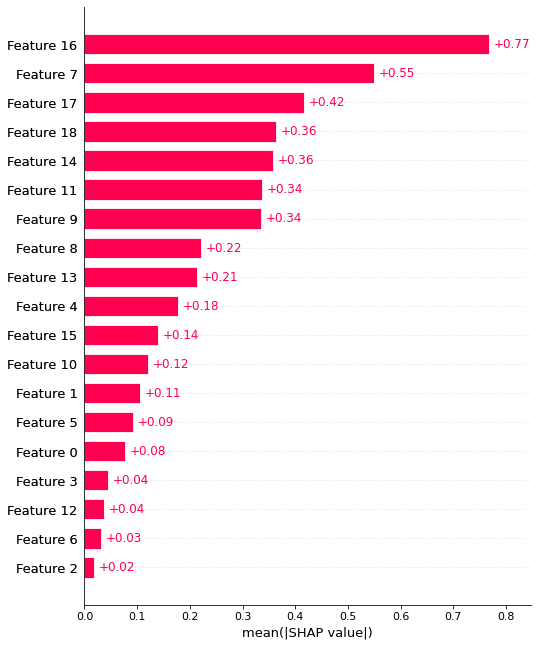

In [ ]:
explainer = shap.LinearExplainer(model, X_train_preprocessed)
shap_values = explainer(X_train_preprocessed)
shap.plots.bar(shap_values, max_display=20)

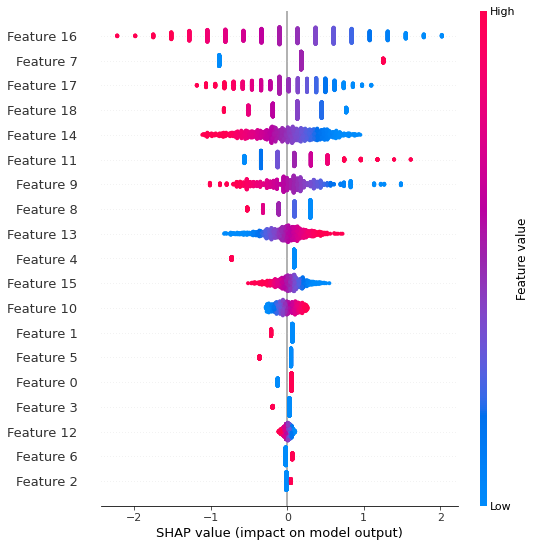

In [ ]:
shap.plots.beeswarm(shap_values, max_display=20)

**Вывод:** num__минуты_предыдущий_месяц: Высокие значения этого признака (долгое время пребывания на сайте) связаны с низкими значениями SHAP. Однако, он имеет самую высокую значимость в предсказании. Модель не уверена в определении класса, но без этого признака качество модели значительно ухудшается. Аналогичная ситуация с num__минуты_текущий_месяц, хотя он является третьим по важности признаком.
ord__акционные_покупки_категория: Этот признак занимает второе место по значимости. Чем выше категория (больше акционных покупок), тем выше значение SHAP.
num__выручка_препредыдущий_месяц: Также имеет обратную зависимость: чем выше выручка, тем выше значение SHAP. Уверенность в определении класса при этом признаке выше.
num__ошибка_сервиса: Практически не оказывает влияния на предсказание. В целом, от этого признака можно избавиться.

## Сегментация покупателей

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1296 non-null   int64   
 1   покупательская_активность            1296 non-null   object  
 2   тип_сервиса                          1296 non-null   object  
 3   разрешить_сообщать                   1296 non-null   object  
 4   маркет_актив_6_мес                   1296 non-null   float64 
 5   маркет_актив_тек_мес                 1296 non-null   int64   
 6   длительность                         1296 non-null   int64   
 7   акционные_покупки                    1296 non-null   float64 
 8   популярная_категория                 1296 non-null   object  
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64   
 11  ошибка_сервиса   

###  Выполнение сегментации покупателей
Ранее были отобраны пользователи выручка которых составляла выше нуля, в пункте 3.3.

In [ ]:
df_money.head()

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

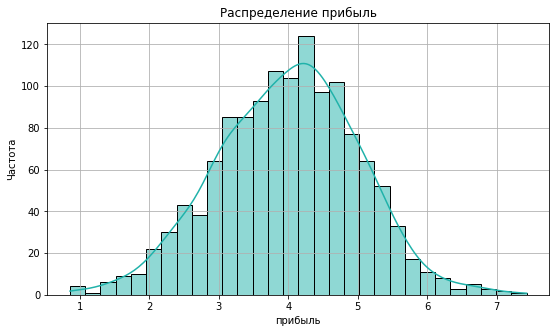

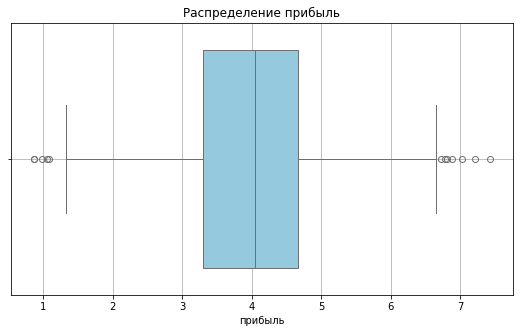

In [ ]:
plot_distribution(df_money, 'прибыль' ,bins=30, color='#20B2AA' )

In [ ]:
df_money.head()

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

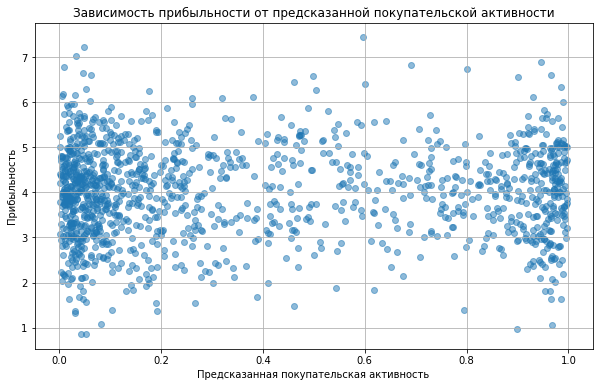

In [ ]:
best_model = randomized_search.best_estimator_
prediction = best_model.predict_proba(merged_data_new.drop(['покупательская_активность'], axis=1))[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(prediction, df_money['прибыль'][:len(prediction)], alpha=0.5)
plt.xlabel('Предсказанная покупательская активность')
plt.ylabel('Прибыльность')
plt.title('Зависимость прибыльности от предсказанной покупательской активности')
plt.grid(True)
plt.show()

Вывод: Наиболее подходящий сегмент в нашей ситуации это с предсказанием выше 80 % и прибыльностью выше 3х.

In [ ]:
threshold = 0.80

prediction_threshold = (prediction > threshold)

df_seg = merged_data_new.loc[prediction_threshold]
df_seg = df_seg.join(df_money)
df_seg = df_seg[df_seg['прибыль'] > 3]
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 1288
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   покупательская_активность            250 non-null    object  
 1   тип_сервиса                          250 non-null    object  
 2   разрешить_сообщать                   250 non-null    object  
 3   маркет_актив_6_мес                   250 non-null    float64 
 4   длительность                         250 non-null    int64   
 5   популярная_категория                 250 non-null    object  
 6   средний_просмотр_категорий_за_визит  250 non-null    int64   
 7   неоплаченные_продукты_штук_квартал   250 non-null    int64   
 8   ошибка_сервиса                       250 non-null    int64   
 9   выручка_предыдущий_месяц             250 non-null    float64 
 10  выручка_препредыдущий_месяц          250 non-null    float64 
 11  выручка_текущий_ме

Теперь посмотрим как они отличаются от других пользователей

### Анализ группы пользователей

In [ ]:
def plot_comparison(df1, df2, name1, name2, col ):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.histplot(df1[col], ax=axes[0], kde=True)
    axes[0].set_title(f'{name1} - {col}')
    axes[0].set_xlabel(col)
    sns.histplot(df2[col], ax=axes[1], kde=True)
    axes[1].set_title(f'{name2} - {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

In [ ]:
def compare_means(df1, df2, name1, name2, col):
    # Получаем среднее значение для каждого фрейма данных
    mean_df1 = df1[col].mean()
    mean_df2 = df2[col].mean()

    # Сравниваем средние значения
    if mean_df1 > mean_df2:
        print(f"Среднее значение в {name1} больше: {mean_df1} > {mean_df2}")
    elif mean_df1 < mean_df2:
        print(f"Среднее значение в {name1} больше: {mean_df2} > {mean_df1}")
    else:
        print("Средние значения равны.")

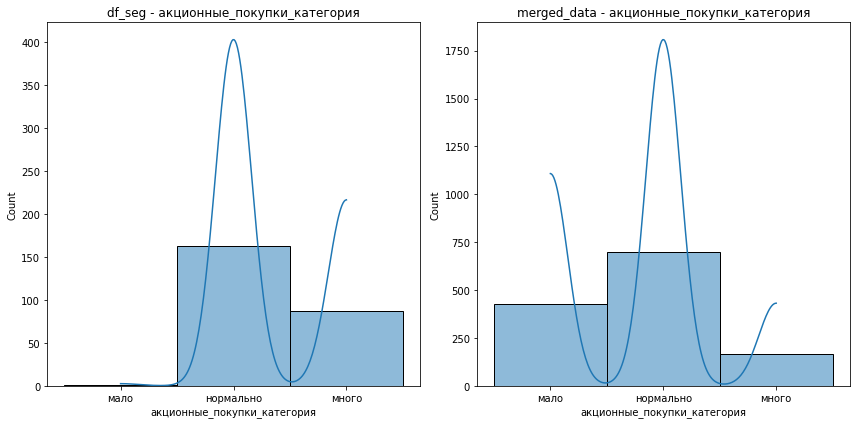

In [ ]:
plot_comparison(df_seg, merged_data, 'df_seg' , 'merged_data', 'акционные_покупки_категория')

**Вывод:** Для сегмента пользователей в категории мало практически нет, в основном покупали акционные товары. Возьмём группу пользователей для которых характерно покупать много товаров по акции.

In [ ]:
df_seg = df_seg[df_seg['акционные_покупки_категория'] == 'много']

In [ ]:
compare_means(df_seg, merged_data, 'df_seg' , 'merged_data', 'минуты_предыдущий_месяц')

Среднее значение в df_seg больше: 13.470679012345679 > 9.689655172413794


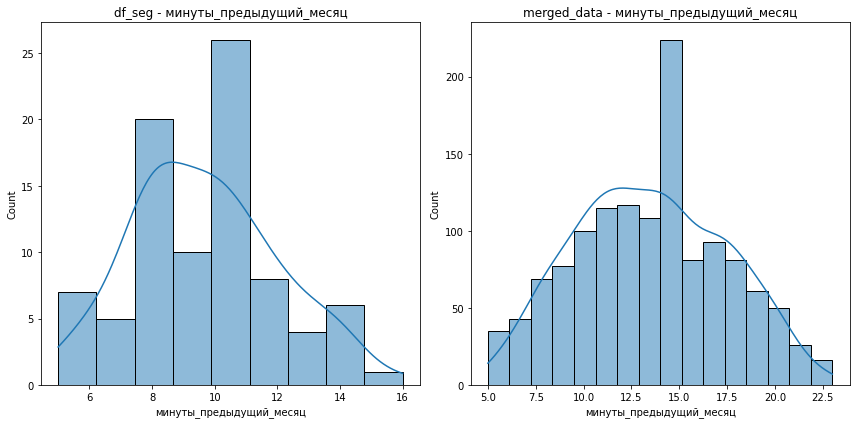

In [ ]:
plot_comparison(df_seg, merged_data, 'df_seg' , 'merged_data', 'минуты_предыдущий_месяц')

**Вывод:** Для сегмента пик сместился в меньшую сторону, следовательно большинство пользователей меньше времени тратили на сайте, хотя в среднем время выше.

In [ ]:
compare_means(df_seg, merged_data,'df_seg' , 'merged_data', 'минуты_текущий_месяц')

Среднее значение в df_seg больше: 13.210648148148149 > 10.091954022988507


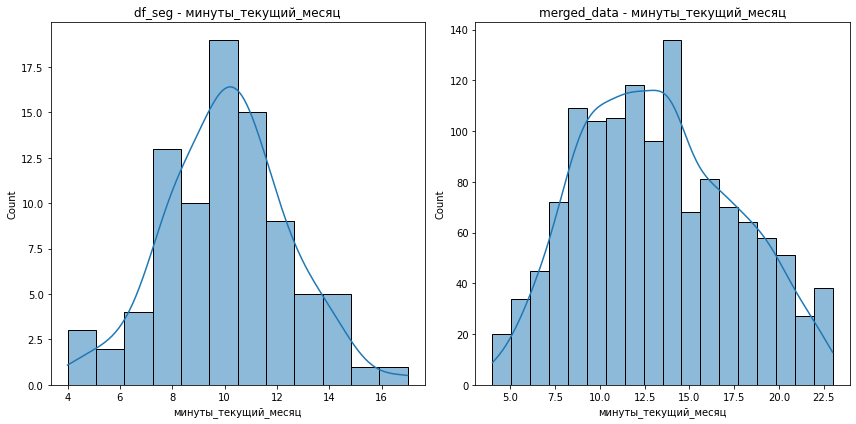

In [ ]:
plot_comparison(df_seg, merged_data,'df_seg' , 'merged_data', 'минуты_текущий_месяц')

**Вывод:** Для сегмента пик сместился в меньшую сторону и стал более выраженным, следовательно большинство пользователей меньше времени тратили на сайте, хотя в среднем время выше.

In [ ]:
compare_means(df_seg, merged_data, 'df_seg' , 'merged_data', 'средний_просмотр_категорий_за_визит')

Среднее значение в df_seg больше: 3.267746913580247 > 2.4482758620689653


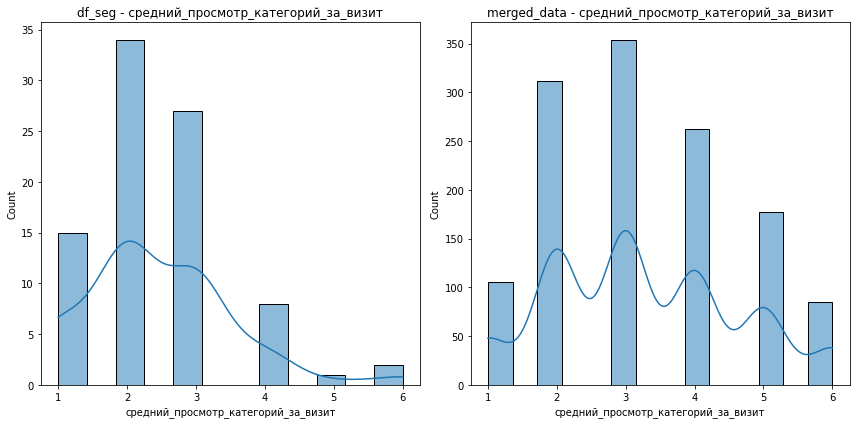

In [ ]:
plot_comparison(df_seg, merged_data, 'df_seg' , 'merged_data', 'средний_просмотр_категорий_за_визит')

**Вывод:** Для сегмента пик сместился в меньшую сторону и стал более выраженным, следовательно большинство пользователей меньше просматривали страниц за визит.

In [ ]:
compare_means(df_seg, merged_data, 'df_seg' , 'merged_data', 'неоплаченные_продукты_штук_квартал')

Среднее значение в df_seg больше: 4.436781609195402 > 2.841820987654321


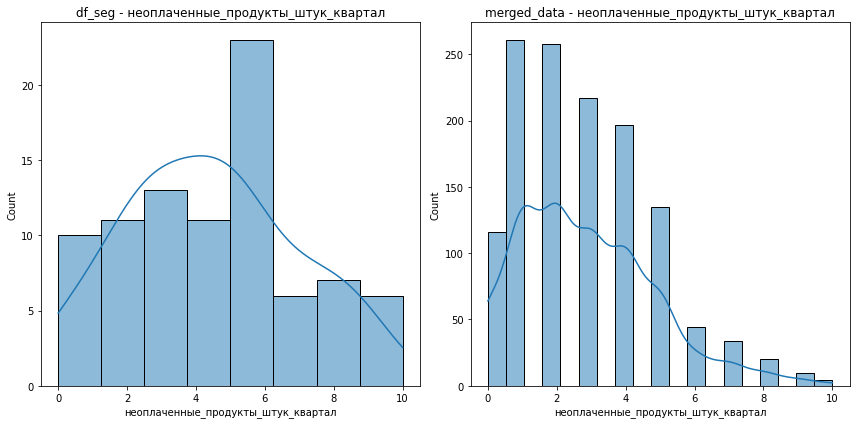

In [ ]:
plot_comparison(df_seg, merged_data, 'df_seg' , 'merged_data', 'неоплаченные_продукты_штук_квартал')

**Вывод:** Для сегмента пользователей характерно изменение пикового значения (5 штук за квартал) в сравнении с 1 или 2. Так же в среднем количество неоплаченных продуктов выше.

### Вывод для сегманта пользователей.
Анализ данных показал, что среди пользователей сайта наблюдаются различия в поведении в зависимости от группы и сегмента, особенностей использования акционных предложений и времени, проводимого на сайте.

1. Поведение пользователей в разных сегментах:
   - Пользователи, совершающие много покупок акционных товаров, составляют незначительную часть аудитории. Это говорит о том, что акционные предложения привлекают клиентов, но их количество возможно снижается с увеличением средней стоимости покупок.
   
2. Изменение активности на сайте:
   - Пользователи, сосредоточенные на многочисленных покупках по акциям, проводят на сайте меньше времени. Это может указывать на более целенаправленное поведение.
   - Среднее количество просмотренных страниц за визит снижается, а среднее время на сайте выше, что говорит о том, что пользователи стали более эффективны в поиске и выборе товаров.
   
3. Неоплаченные продукты в корзине:
   - Пользователи, предпочитающие акционные предложения, оставляют в корзине больше неоплаченных продуктов, что может свидетельствовать о более внимательном отборе и ожидании снижения цены.

Предложения по повышению активности постоянных клиентов:
- Персонализация предложений: Для постоянных пользователей, чтобы предложить персонализированные скидки и специальные акция для стимулирования покупок. Или же введение больше акционных товаров.
- Возможно может повлиять улучшение интерфейса сайта например оптимизация интерфейса и навигации сайта, чтобы помочь пользователям быстрее найти интересующие их товары.

## Общий вывод

1. Загрузка данных
2. Предобработка данных:
   - Произведена предварительная обработка данных, включающая изменение названий столбцов для удобства работы с ними.
   - Проверка на наличие дубликатов показала, что дублирующих записей не обнаружено.

3. Исследовательский анализ данных:
   - Проведен анализ данных для таблиц df_main и df_market_money.
   - Отобраны клиенты на основе выручки.
   
4. Объединение таблиц:
   - Произведено объединение таблиц на основе уникальных идентификаторов клиентов.

5. Корреляционный анализ:
   - Проверка корреляции между признаками не выявила проблему мультиколлинеарности.
   - Корреляционный анализ выявил признаки имеющие наибольшую зависимость с целевым (Покупательская активность)

6. Использование пайплайнов и построение модели:
   - Применена модель LogisticRegression с гиперпараметрами C=4, penalty='l1', solver='liblinear' и масштабированием StandardScaler().
   - В качестве метрики выбрана roc_auc, учитывая бинарную классификацию задачи.
   - Модель демонстрирует хороший показатель метрики roc_auc на тестовой выборке (0.89).
   - Проблема мультиколлинеарности отсутствует, что позволяет строить модель без дополнительных манипуляций с признаками.
   - Лучшая модель LogisticRegression показывает высокий показатель метрики roc_auc, однако возможно улучшение этого показателя за счет оптимизации признаков.
   
7. Анализ значимости признаков:
    
    - Анализ значимости признаков с использованием метода SHAP выявил, что признаки num__минуты_предыдущий_месяц, num__минуты_текущий_месяц, ord__акционные_покупки_категория и num__выручка_препредыдущий_месяц оказывают значительное влияние на модель.

8. Сегментация покупателей:

    - Пользователи сайта демонстрируют различное поведение в зависимости от сегмента и группы, особенно по активности использования акционных предложений и времени, проведенного на сайте.


Предложения по повышению активности постоянных клиентов:
   - Персонализация предложений для постоянных пользователей, включая персонализированные скидки и специальные акции.
   - Улучшение интерфейса сайта, например, оптимизация навигации для помощи пользователям в быстром поиске интересующих их товаров.